# AIRBNB NEW YORK PRICING DYNAMICS
### Data Bootcamp Final Project

###### *Principal Investigators : Samantha Warsop & Brittany Miu*                           
###### Email: sw3469@nyu.edu bm2352@nyu.edu

This project will explore how pricing differs across Airbnbs and the influences it has on demand. We will also explore the seasonal pattern of airbnb prices in New York and the effects it has on travel. As an example, in New York City, Airbnb prices across different neighbourhood groups such as Manhattan, Brooklyn, Queens, Staten Island, and the Bronx might differ. We can look at how pricing is varies across these different neighbourhood groups in terms of the number of the listings available and property type available. 

The key element of the project is the use of Airbnb’s data, providing access to measures such as prices, number of listings, property type, etc.  in New York. Detailed of this dataset are described below in the data report. 

There will be three different sections in this project: 
##### 1. What causes the different pricing across neighbourhood groups? 

This section will have basic summary statistics describing the number of listings and property type in each neighbourhood group.
##### 2. How do prices affect demand for Airbnbs in New York? 

This section will explore how prices differ across different neighbourhood groups and discover what factors prices are dependent on. We will have visualizations such as a map to indicate where entire apartments/homes are most prevalent. There will be a bar chart illustrating the average prices in each neighbourhood. By analyzing the number of listings and prices per neighbourhood, we can find out which neighbourhood is the most optimal. 
##### 3. Seasonal Pattern of Prices 

The last will explore how prices vary across different seasons. We plan to have visualizations showing how prices change over the year and provide explanations as to why. For example, airbnb prices during the holidays might be more expensive than during non-holidays. 

### Overview: 
The data behind our project comes from [insideairbnb](http://insideairbnb.com/get-the-data.html) . Their [New York city data](http://insideairbnb.com/new-york-city/) provides access to information on room types, availability, activity, as well as listings per host. 

##### Important Variables:
The key series that we must retrive is within insideairbnb's data on [New York city data](http://insideairbnb.com/new-york-city/).
This data provides the airbnb locations, as well as pricing, which will allow us to determine answers to both questions 1 and 2.  
This data combined with utalizing datetime and holiday functions will allow us to analyze Airbnb's seasonal pattern of prices.  


##### Access: 
We will use insideairbnb to download and acess the data. Below we will demonstrate that we have the ability to access the data. 


##### Requisite Packages:  
Below we will bring in the packages we need:

In [1]:
import pandas as pd
import numpy as np #numerical analysis 
import matplotlib.pyplot as plt #plotting
import pyarrow as pa #speed up data impo
import pyarrow.parquet as pq
import time
import bokeh  # interactive data visualization 
from datetime import date
import re 

##### Cleaned Data: 

Data that was cleaned in a separate notebook can be accessed in our [Data Report](http://localhost:8888/notebooks/Desktop/Airbnb_Data%20Report_SamanthaWarsop_BrittanyMiu.ipynb)

## ANALYSIS PART ONE
### What causes different pricing across neighborhood groups?

In [2]:
file =  "/Users/brittanymiu/Airbnb New York/listings.csv"

In [3]:
airbnb_ny = pd.read_csv(file)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
airbnb_ny.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1742654,https://www.airbnb.com/rooms/1742654,20190503153024,2019-05-04,High Floor apt.near Columbus Circle,"Deep in the heart of Manhattan, this Little To...",NaN,"Deep in the heart of Manhattan, this Little To...",none,This neighborhood is amazing. The best in nigh...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,1.87
1,23502842,https://www.airbnb.com/rooms/23502842,20190503153024,2019-05-04,Cozy East Village studio,Studio apartment on a quiet street. Great nat...,NaN,Studio apartment on a quiet street. Great nat...,none,Very quiet street but restaurants /cafes /wine...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.66
2,15984984,https://www.airbnb.com/rooms/15984984,20190503153024,2019-05-04,Great Location by Subway!,I have a very spacious apartment right next to...,NaN,I have a very spacious apartment right next to...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.24
3,13820083,https://www.airbnb.com/rooms/13820083,20190503153024,2019-05-04,Beautiful Cozy Garden Apt- Historic Clinton Hill,"Non Smoking. Close to Barclays Center, Peaches...",The space is on the first floor local train: A...,"Non Smoking. Close to Barclays Center, Peaches...",none,Clinton hill is regentrified and often referre...,...,t,f,moderate,f,f,2,2,0,0,0.27
4,6170979,https://www.airbnb.com/rooms/6170979,20190503153024,2019-05-04,Cozy 1 Bedroom apartment fitting 4,The Apartment is in a safe environment next to...,NaN,The Apartment is in a safe environment next to...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,2.63


In [6]:
airbnb_ny.fillna(0, inplace = True)
airbnb_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.23,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,43,2019-01-02,0.38,2,365
2,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.70856,-73.94236,Private room,70,5,39,2018-12-07,0.35,3,217
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,239,2019-03-03,4.43,1,164


In [7]:
airbnb_ny.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
airbnb_ny['price'] = airbnb_ny["price"].astype(float)
airbnb_ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.23,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,43,2019-01-02,0.38,2,365
2,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.70856,-73.94236,Private room,70.0,5,39,2018-12-07,0.35,3,217
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,239,2019-03-03,4.43,1,164
5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.11,1,12
6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,185.0,2,70,2018-12-02,0.58,1,18
7,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.41,1,0
8,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,415,2019-02-17,3.47,1,158
9,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,1.02,1,0


In [9]:
room_type = airbnb_ny.groupby('room_type').id.count()
room_type = room_type.reset_index()
room_type = room_type.rename(columns = {'id': 'room_count'})
room_type 

,room_type,room_count
0,Entire home/apt,26061
1,Private room,22578
2,Shared room,1109


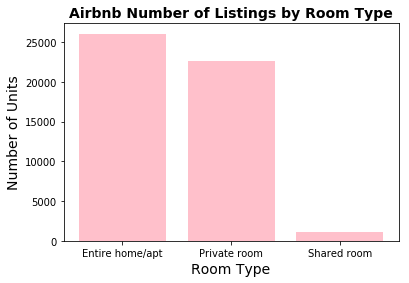

In [10]:
fig, ax = plt.subplots()

ax.bar(room_type.room_type, room_type.room_count, color = "pink")

ax.set_title("Airbnb Number of Listings by Room Type", fontsize = 14, fontweight = "bold")  
                                                                  
ax.set_ylabel("Number of Units", fontsize = 14,)
ax.set_xlabel("Room Type", fontsize = 14,)
    
plt.show()

In [11]:
neighborhood_group_df = airbnb_ny.groupby('neighbourhood_group').id.count()
neighborhood_group_df = neighborhood_group_df.reset_index()
neighborhood_group_df = neighborhood_group_df.rename(columns={'id':'Number_of_Listings'})
neighborhood_group_df

,neighbourhood_group,Number_of_Listings
0,Bronx,1001
1,Brooklyn,20312
2,Manhattan,22559
3,Queens,5525
4,Staten Island,351


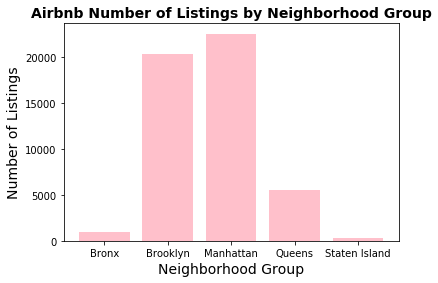

In [12]:
fig, ax = plt.subplots()

ax.bar(neighborhood_group_df.neighbourhood_group, neighborhood_group_df.Number_of_Listings, color = "pink")

ax.set_title("Airbnb Number of Listings by Neighborhood Group", fontsize = 14, fontweight = "bold")  
                                                                  
ax.set_ylabel("Number of Listings", fontsize = 14,)
ax.set_xlabel("Neighborhood Group", fontsize = 14,)
    
plt.show()

In [13]:
neighborhood_room = airbnb_ny.groupby(['neighbourhood_group', 'room_type']).id.count()
neighborhood_room = neighborhood_room.reset_index()
neighborhood_room = neighborhood_room.rename(columns={'id':'Number_of_Listings'})
neighborhood_room

,neighbourhood_group,room_type,Number_of_Listings
0,Bronx,Entire home/apt,339
1,Bronx,Private room,616
2,Bronx,Shared room,46
3,Brooklyn,Entire home/apt,9568
4,Brooklyn,Private room,10346
5,Brooklyn,Shared room,398
6,Manhattan,Entire home/apt,13985
7,Manhattan,Private room,8106
8,Manhattan,Shared room,468
9,Queens,Entire home/apt,2008


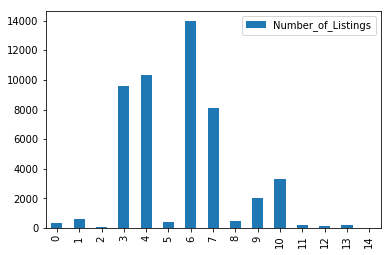

In [14]:
neighborhood_room.plot(kind = "bar")

In [19]:
neighbourhood_df = airbnb_ny.groupby(['neighbourhood_group', 'neighbourhood']).id.count()
neighbourhood_df = neighbourhood_df.reset_index()
neighbourhood_df = neighbourhood_df.rename(columns = {'id': 'number_of_listings'})
neighbourhood_df.head()

,neighbourhood_group,neighbourhood,number_of_listings
0,Bronx,Allerton,37
1,Bronx,Baychester,7
2,Bronx,Belmont,23
3,Bronx,Bronxdale,20
4,Bronx,Castle Hill,5


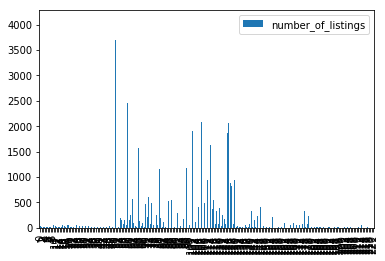

In [22]:
neighbourhood_df.plot(kind = 'bar')